<a href="https://colab.research.google.com/github/jonhyuk0922/kaggle_study/blob/main/Titanic_Competition_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. Read Data

In [ ]:
pip install kaggle

ERROR: Operation cancelled by user


In [ ]:
train_df = pd.read_csv('../Titanic_Disaster/DataSet/train.csv', index_col='PassengerId')
print(train_df.shape)
train_df.head()

FileNotFoundError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving t_test.csv to t_test.csv
Saving t_train.csv to t_train.csv


In [ ]:
train_df = pd.read_csv('t_train.csv',index_col='PassengerId')
test_df = pd.read_csv('t_test.csv',index_col='PassengerId')
print(train_df.shape)
train_df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info() #None == Not a number , so none != null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_df.describe() #문자열 제공 X

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df = pd.read_csv('t_test.csv',index_col ='PassengerId')
print(test_df.shape)
test_df.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
test_df.info() ; test_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


#2.Preprocessing(전처리)

In [ ]:
train_df.loc[train_df['Sex'] =='female','Sex'] =0
train_df.loc[train_df['Sex'] == 'male','Sex'] =1
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
test_df.loc[test_df['Sex'] =='female','Sex'] =0
test_df.loc[test_df['Sex'] == 'male','Sex'] =1
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [ ]:
test_df[test_df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S


In [ ]:
mean_third_fare = train_df[train_df['Pclass']== 3]['Fare'].mean()
print(mean_third_fare)

13.675550101832997


In [ ]:
test_df.loc[test_df['Fare'].isnull(),'Fare'] = mean_third_fare

In [ ]:
test_df[test_df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [ ]:
mean_age_1 = train_df[train_df['Pclass']==1].Age.mean()
mean_age_2 = train_df[train_df['Pclass']==2].Age.mean()
mean_age_3 = train_df[train_df['Pclass']==3].Age.mean()

print(mean_age_1)
print(mean_age_2)
print(mean_age_3)

38.233440860215055
29.87763005780347
25.14061971830986


In [ ]:
train_df.loc[train_df['Pclass']==1,'Age'] =mean_age_1
train_df.loc[train_df['Pclass']==2,'Age'] =mean_age_2
train_df.loc[train_df['Pclass']==3,'Age'] =mean_age_3

train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [ ]:
test_df.loc[test_df['Pclass']==1,'Age'] =mean_age_1
test_df.loc[test_df['Pclass']==2,'Age'] =mean_age_2
test_df.loc[test_df['Pclass']==3,'Age'] =mean_age_3

test_df[test_df['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


#One hot encoding

In [ ]:
'''
C == [1,0,0]
S == [0,1,0]
Q == [0,0,1]

C == [True,False,False]
S == [False,True,False]
Q == [False,False,True]
'''



'\nC == [1,0,0]\nS == [0,1,0]\nQ == [0,0,1]\n\nC == [True,False,False]\nS == [False,True,False]\nQ == [False,False,True]\n'

In [ ]:
train_df['Embarked_C'] = train_df['Embarked'] =='C'
train_df['Embarked_S'] = train_df['Embarked'] =='S'
train_df['Embarked_Q'] = train_df['Embarked'] =='Q'
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,25.140620,1,0,A/5 21171,7.2500,NaN,S,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.233441,1,0,PC 17599,71.2833,C85,C,True,False,False
3,1,3,"Heikkinen, Miss. Laina",0,25.140620,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,38.233441,1,0,113803,53.1000,C123,S,False,True,False
5,0,3,"Allen, Mr. William Henry",1,25.140620,0,0,373450,8.0500,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,29.877630,0,0,211536,13.0000,NaN,S,False,True,False
888,1,1,"Graham, Miss. Margaret Edith",0,38.233441,0,0,112053,30.0000,B42,S,False,True,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.140620,1,2,W./C. 6607,23.4500,NaN,S,False,True,False


In [ ]:
test_df['Embarked_C'] = test_df['Embarked'] =='C'
test_df['Embarked_S'] = test_df['Embarked'] =='S'
test_df['Embarked_Q'] = test_df['Embarked'] =='Q'
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,25.140620,0,0,330911,7.8292,NaN,Q,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,25.140620,1,0,363272,7.0000,NaN,S,False,True,False
894,2,"Myles, Mr. Thomas Francis",1,29.877630,0,0,240276,9.6875,NaN,Q,False,False,True
895,3,"Wirz, Mr. Albert",1,25.140620,0,0,315154,8.6625,NaN,S,False,True,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,25.140620,1,1,3101298,12.2875,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,25.140620,0,0,A.5. 3236,8.0500,NaN,S,False,True,False
1306,1,"Oliva y Ocana, Dona. Fermina",0,38.233441,0,0,PC 17758,108.9000,C105,C,True,False,False
1307,3,"Saether, Mr. Simon Sivertsen",1,25.140620,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True,False


In [ ]:
train_df['Pclass_1'] = train_df['Pclass'] == 1
train_df['Pclass_2'] = train_df['Pclass'] == 2
train_df['Pclass_3'] = train_df['Pclass'] == 3
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,25.140620,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.233441,1,0,PC 17599,71.2833,C85,C,True,False,False,True,False,False
3,1,3,"Heikkinen, Miss. Laina",0,25.140620,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,38.233441,1,0,113803,53.1000,C123,S,False,True,False,True,False,False
5,0,3,"Allen, Mr. William Henry",1,25.140620,0,0,373450,8.0500,NaN,S,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,29.877630,0,0,211536,13.0000,NaN,S,False,True,False,False,True,False
888,1,1,"Graham, Miss. Margaret Edith",0,38.233441,0,0,112053,30.0000,B42,S,False,True,False,True,False,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.140620,1,2,W./C. 6607,23.4500,NaN,S,False,True,False,False,False,True


In [ ]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
test_df['Pclass_1'] = test_df['Pclass'] == 1
test_df['Pclass_2'] = test_df['Pclass'] == 2
test_df['Pclass_3'] = test_df['Pclass'] == 3
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,25.140620,0,0,330911,7.8292,NaN,Q,False,False,True,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,25.140620,1,0,363272,7.0000,NaN,S,False,True,False,False,False,True
894,2,"Myles, Mr. Thomas Francis",1,29.877630,0,0,240276,9.6875,NaN,Q,False,False,True,False,True,False
895,3,"Wirz, Mr. Albert",1,25.140620,0,0,315154,8.6625,NaN,S,False,True,False,False,False,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,25.140620,1,1,3101298,12.2875,NaN,S,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,25.140620,0,0,A.5. 3236,8.0500,NaN,S,False,True,False,False,False,True
1306,1,"Oliva y Ocana, Dona. Fermina",0,38.233441,0,0,PC 17758,108.9000,C105,C,True,False,False,True,False,False
1307,3,"Saether, Mr. Simon Sivertsen",1,25.140620,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True,False,False,False,True


In [ ]:
feature_names = ['Sex', 'Age', 'SibSp', 'Parch',
       'Fare','Embarked_C', 'Embarked_S', 'Embarked_Q',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
feature_names

['Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [ ]:
x_train = train_df[feature_names]
print(x_train.shape)
x_train.head()

(891, 11)


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,1,25.140620,1,0,7.2500,False,True,False,False,False,True
2,0,38.233441,1,0,71.2833,True,False,False,True,False,False
3,0,25.140620,0,0,7.9250,False,True,False,False,False,True
4,0,38.233441,1,0,53.1000,False,True,False,True,False,False
5,1,25.140620,0,0,8.0500,False,True,False,False,False,True


In [ ]:
x_test= test_df[feature_names]
print(x_test.shape)
x_test.head()

(418, 11)


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
892,1,25.14062,0,0,7.8292,False,False,True,False,False,True
893,0,25.14062,1,0,7.0000,False,True,False,False,False,True
894,1,29.87763,0,0,9.6875,False,False,True,False,True,False
895,1,25.14062,0,0,8.6625,False,True,False,False,False,True
896,0,25.14062,1,1,12.2875,False,True,False,False,False,True


In [ ]:
y_train = train_df['Survived']
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier        #나무 하나
from sklearn.ensemble import RandomForestClassifier       #여러개를 같이

In [ ]:
#model = DecisionTreeClassifier(max_depth=5)
#model

In [ ]:
model = RandomForestClassifier(max_depth=150,
                       max_features=0.8,
                       n_estimators=500,
                       random_state=42)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features=0.8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features=0.8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#Feature Importance

In [ ]:
importances = model.feature_importances_
importances

array([0.34899814, 0.05670482, 0.05085818, 0.05366815, 0.37549756,
       0.01606782, 0.021058  , 0.00886693, 0.01002178, 0.00627693,
       0.05198169])

In [ ]:
indices = np.argsort(importances)[::-1]
indices

array([ 4,  0,  1,  3, 10,  2,  6,  5,  8,  7,  9])

In [ ]:
importances_names = [feature_names[i] for i in indices]
importances_names

['Fare',
 'Sex',
 'Age',
 'Parch',
 'Pclass_3',
 'SibSp',
 'Embarked_S',
 'Embarked_C',
 'Pclass_1',
 'Embarked_Q',
 'Pclass_2']

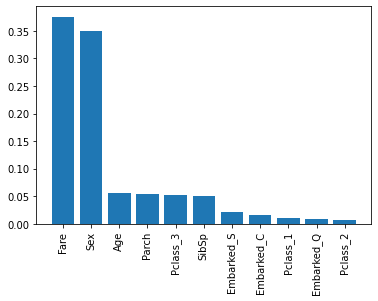

In [ ]:
plt.figure()
plt.bar(range(len(importances_names)),importances[indices])
plt.xticks(range(len(importances_names)),importances_names, rotation=90) 
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
model = RandomForestClassifier(max_depth=150,
                       max_features=0.8,
                       n_estimators=500,
                       random_state=42)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features=0.8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
selector = SelectFromModel(model,threshold=0.1)
selector

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=150,
                                                 max_features=0.8,
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=None,
                                                 oob_score=False,
   

In [ ]:
feature_important = selector.fit_transform(train_df[feature_names],train_df['Survived'])
feature_important

array([[1, 7.25],
       [0, 71.2833],
       [0, 7.925],
       ...,
       [0, 23.45],
       [1, 30.0],
       [1, 7.75]], dtype=object)

In [ ]:
model.fit(feature_important, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features=0.8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#list comprehension
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
sample = []
for i in range(1,10):
  sample.append(i)
sample

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
proper_features =train_df[feature_names].columns[selector.get_support()]
proper_features

Index(['Sex', 'Fare'], dtype='object')

In [ ]:
from sklearn.metrics import  mean_squared_error, accuracy_score

In [ ]:
mean_squared_error(model.predict(x_train[proper_features]),y_train)

0.09764309764309764

In [ ]:
accuracy_score(model.predict(x_train[proper_features]),y_train)

0.9023569023569024

#Submit

In [ ]:
prediction = model.predict(x_test[proper_features])
print(prediction.shape)

(418,)


In [ ]:
from google.colab import files
upload = files.upload()

Saving t_gender_submission.csv to t_gender_submission.csv


In [ ]:
submit =pd.read_csv('t_gender_submission.csv',index_col='PassengerId')
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [ ]:
submit['Survived'] = prediction 

In [ ]:
submit

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
submit.to_csv('re_submit.csv')